Consider a real-world scenario where you need to conduct a statistical test for paired data, multiple population means, or variance comparisons. Describe the problem, the data, and the research question. Discuss the appropriate statistical test that you would use to address the research question and explain why. Perform the test. Propose a Python tool to assist with the interpretation of the results of the statistical test and visualizations. How can you use the results to inform decisions or actions in the real-world scenario?

Asthma is an issue that affects around 7.7 percent of americans according to the CDC(2021). This dataset from kaggle contains peak flow rate of smokers among other variables. We can investigate how smoking status plays a role in peak flow.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('asthma_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,None,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,None,159


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        300 non-null    int64 
 1   Age               300 non-null    int64 
 2   Gender            300 non-null    object
 3   Smoking_Status    300 non-null    object
 4   Asthma_Diagnosis  300 non-null    object
 5   Medication        300 non-null    object
 6   Peak_Flow         300 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ KB


In [4]:
df = df.loc[df['Asthma_Diagnosis']=='Yes']

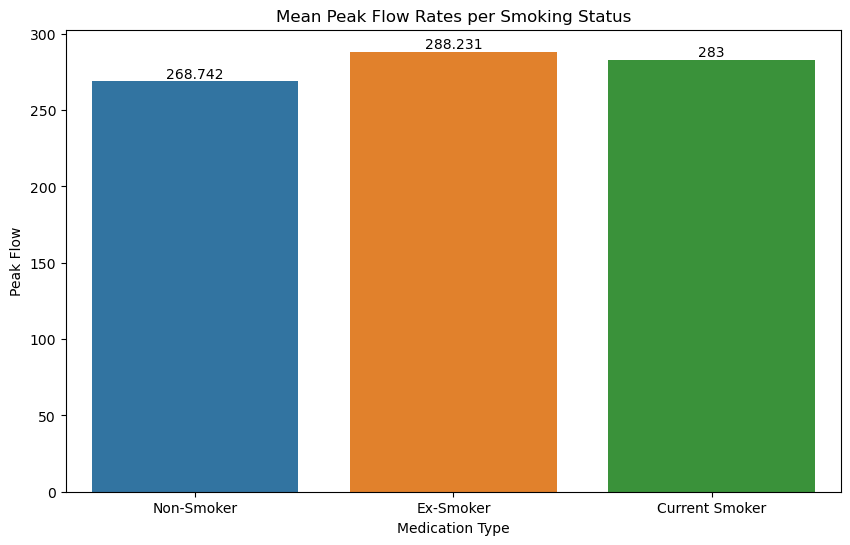

In [6]:
#plt means of groups
ax = plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x='Smoking_Status', y='Peak_Flow', hue='Smoking_Status',
                 estimator = 'mean', errorbar=None)
ax.set_xlabel('Medication Type')
ax.set_ylabel('Peak Flow')
ax.set_title('Mean Peak Flow Rates per Smoking Status')
for i in ax.containers:
    ax.bar_label(i,)

In [7]:
#break into categories
non_smoker = df['Peak_Flow'].loc[df['Smoking_Status']=='Non-Smoker']
ex_smoker = df['Peak_Flow'].loc[df['Smoking_Status'] == 'Ex-Smoker']
current_smoker = df['Peak_Flow'].loc[df['Smoking_Status'] == 'Current Smoker']

In [8]:
# Investigate equal variance assumption
#use levene method to investigate
stats.levene(non_smoker,ex_smoker,current_smoker)

LeveneResult(statistic=0.39367622460897606, pvalue=0.6752493345887158)

The levene test gives a p-value above 0.05, so we can accept the null hypothesis that the data is is of equal variance. 

In [9]:
#fit to linear regression model and calculate normality with shapiro
model = ols(formula = 'Peak_Flow ~ C(Smoking_Status)',  
             data = df).fit()

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9532122015953064, pvalue=4.079893551534042e-05)

The data does not follow the null hypothesis that the data follows a normal distribution. We can use a kruskal-wallis test that allows for non-parametric samples.

In [10]:
stats.kruskal(non_smoker, ex_smoker,current_smoker)

KruskalResult(statistic=1.9626870410205433, pvalue=0.3748071992678698)

While the means visually look like they are affected by smoking status, further statistical analysis shows that there is not a significant difference. Therefore we accept the null hypothesis that smoking does not affect flow rate. Measuring peak flow rate involves blowing into a device and a normal range is between 400-700. Since this data is taken from patients with chronic obstructive pulmonary disease (COPD), we can expect the results to be critically low. 

References 
Breathing and lung function tests. (n.d.). https://www.asthmaandlung.org.uk/sites/default/files/Section 2.1 - tests to measure your breathing.pdf 

Centers for Disease Control and Prevention. (2023, May 10). Most recent national asthma data. Centers for Disease Control and Prevention. https://www.cdc.gov/asthma/most_recent_national_asthma_data.htm 

An essential guide to hypothesis testing: All you need to know. Kaggle. (n.d.). https://www.kaggle.com/discussions/general/383760 

Jasonkryske. (2023, July 25). One and two-way ANOVA in python. Kaggle. https://www.kaggle.com/code/jasonkryske/one-and-two-way-anova-in-python/notebook#Two-way-ANOVA 

Jatinthakur706. (2024, February 10). COPD (asthma) patient dataset. Kaggle. https://www.kaggle.com/datasets/jatinthakur706/copd-asthma-patient-dataset 
